<a href="https://colab.research.google.com/github/KhyatiMahendru/Applications-Linear-Algebra/blob/master/Applications_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

# Linear Algebra in Computer Vision

## Image Representation as Tensors

### Grayscale Images

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [0]:
data = digits.images[0]

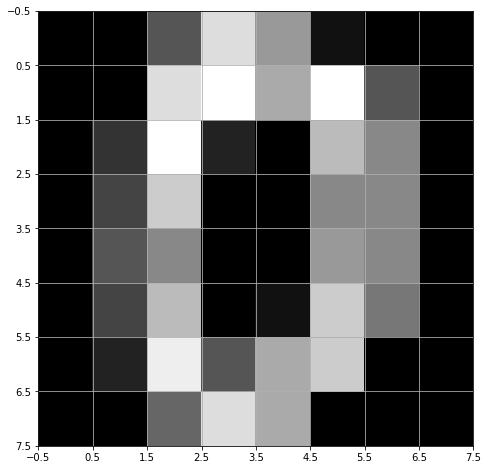

In [4]:
#Display the first digit
plt.figure(1, figsize=(8, 8))
plt.imshow(data, cmap = 'gray', interpolation='nearest')
plt.xticks(np.arange(-0.5, 8.5, 1))
plt.yticks(np.arange(-0.5, 8.5, 1))
plt.grid(True)
plt.show()

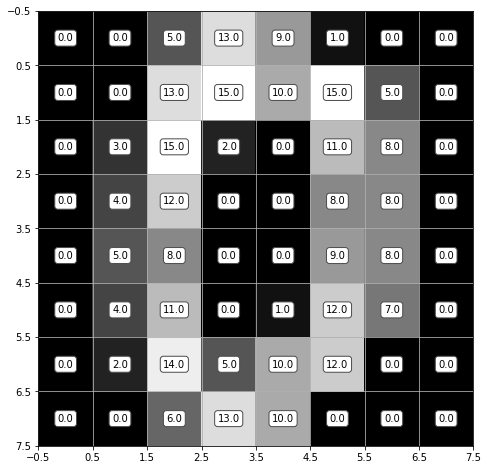

In [5]:
#Display the first digit
plt.figure(1, figsize=(8, 8))
plt.imshow(data, cmap = 'gray', interpolation='nearest')
plt.xticks(np.arange(-0.5, 8.5, 1))
plt.yticks(np.arange(-0.5, 8.5, 1))
for (i, j), z in np.ndenumerate(data):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(True)
plt.show()

### Colored Images

In [6]:
!wget "https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg"

--2019-07-26 06:51:19--  https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3506068 (3.3M) [image/jpeg]
Saving to: ‘Mona_Lisa.jpg.1’

Mona_Lisa.jpg.1     100%[===================>]   3.34M  16.8MB/s    in 0.2s    

2019-07-26 06:51:19 (16.8 MB/s) - ‘Mona_Lisa.jpg.1’ saved [3506068/3506068]



In [7]:
! ls

1.jpeg	Mona_Lisa.jpg  Mona_Lisa.jpg.1	sample_data  shakespeare.txt


In [0]:
img = cv2.imread('Mona_Lisa.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
RGB_img.shape

(4289, 2835, 3)

(-0.5, 2834.5, 4288.5, -0.5)

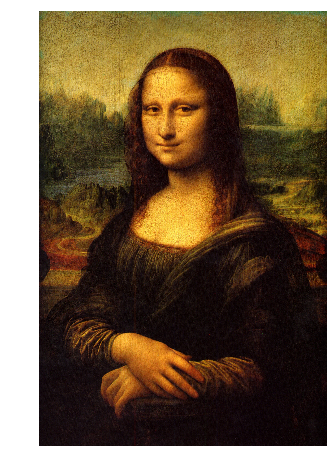

In [10]:
plt.figure(figsize = (8, 8))
plt.imshow(RGB_img)
plt.axis('off')

In [0]:
# separate image into R, G and B channels
R_img = RGB_img[:, :, 0]
G_img = RGB_img[:, :, 1]
B_img = RGB_img[:, :, 2]

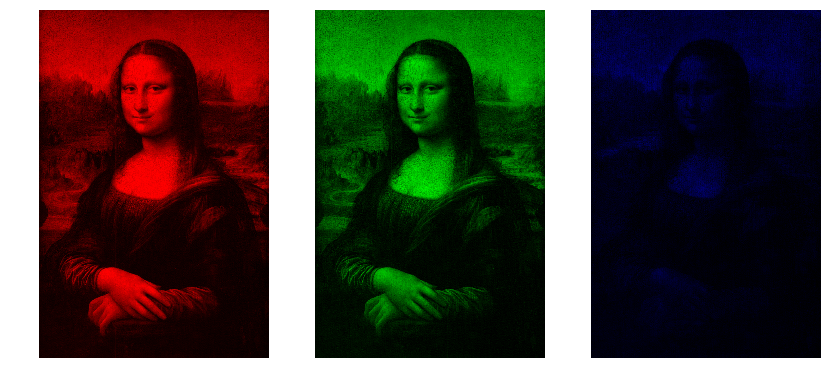

In [12]:
# visualize the 3 channels
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(14,8))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(RGB_img.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = RGB_img[ :, :, c]
    
    # display each channel
    ax.imshow(split_img), ax.axis('off')


## Image Processing using 2D Convolution

In [13]:
# get the image from "https://drive.google.com/file/d/1aM4otWKSsDz1Rof3LZkY055YkYXeO-vf/view"
from google.colab import files
uploaded = files.upload()

Saving 1.jpeg to 1 (1).jpeg


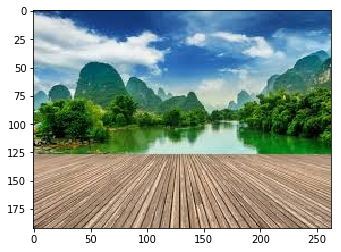

In [14]:
# original image
img = cv2.imread('1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

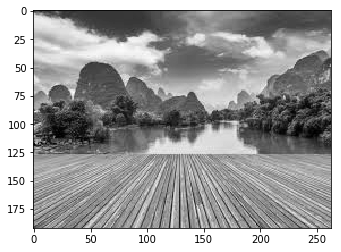

In [15]:
# image in grayscale
from skimage.color import rgb2gray
gray = rgb2gray(img)
plt.imshow(gray, cmap = 'gray')

In [0]:
# define kernels

# filter to sharpen image
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpen2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# filter to blur image (box blur)
boxblur = np.ones((3,3),np.float32)/9

# sobel filters: Vertical and Horizontal edge detection
sobel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_h = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# laplace filter: Edge Detection
laplace = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

In [0]:
from scipy import ndimage

In [0]:
# images after convolution
edge_h = ndimage.convolve(gray, sobel_h, mode='reflect')
edge_v = ndimage.convolve(gray, sobel_v, mode='reflect')
edge = ndimage.convolve(gray, laplace, mode='reflect')
sharp_img = ndimage.convolve(gray, sharpen, mode='reflect')
blur_img = ndimage.convolve(gray, boxblur, mode='reflect')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f84696b6358>,
 Text(0.5, 1.0, 'All Edges'))

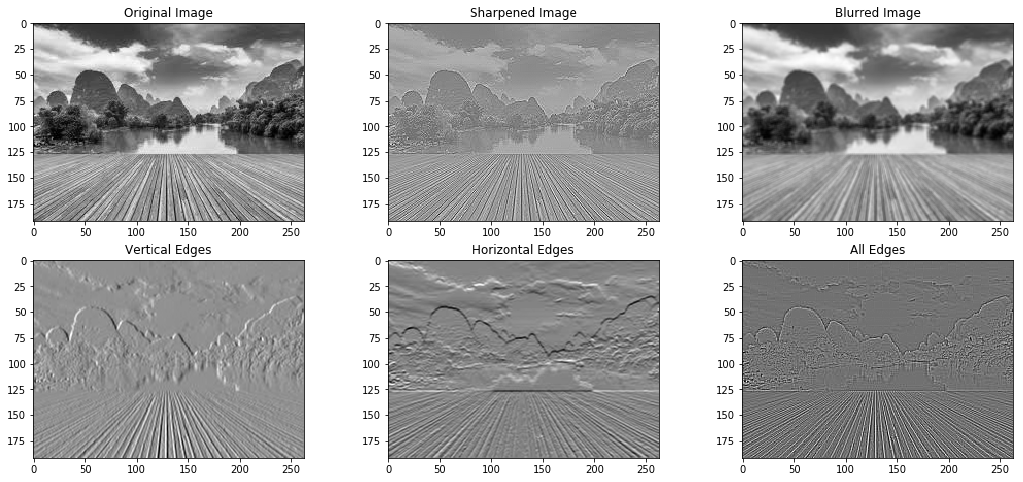

In [19]:
plt.figure(figsize = (18, 8))
plt.subplot(2, 3, 1),plt.imshow(gray, cmap = 'gray'),plt.title('Original Image')
plt.subplot(2, 3, 2),plt.imshow(sharp_img, cmap = 'gray'),plt.title('Sharpened Image')
plt.subplot(2, 3, 3),plt.imshow(blur_img, cmap = 'gray'),plt.title('Blurred Image')
plt.subplot(2, 3, 4),plt.imshow(edge_v, cmap = 'gray'),plt.title('Vertical Edges')
plt.subplot(2, 3, 5),plt.imshow(edge_h, cmap = 'gray'),plt.title('Horizontal Edges')
plt.subplot(2, 3, 6),plt.imshow(edge, cmap = 'gray'),plt.title('All Edges')

# Linear Algebra in Natural Language Processing

## Word Embeddings

In [0]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
!wget "https://norvig.com/ngrams/shakespeare.txt"

--2019-07-26 06:51:43--  https://norvig.com/ngrams/shakespeare.txt
Resolving norvig.com (norvig.com)... 158.106.138.13
Connecting to norvig.com (norvig.com)|158.106.138.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4538523 (4.3M) [text/plain]
Saving to: ‘shakespeare.txt.1’

shakespeare.txt.1   100%[===================>]   4.33M  13.3MB/s    in 0.3s    

2019-07-26 06:51:43 (13.3 MB/s) - ‘shakespeare.txt.1’ saved [4538523/4538523]



In [0]:
with open('shakespeare.txt') as f:
    lines = f.read().splitlines()

In [24]:
lines[:50]

["A MIDSUMMER-NIGHT'S DREAM",
 '',
 'Now , fair Hippolyta , our nuptial hour ',
 'Draws on apace : four happy days bring in ',
 'Another moon ; but O ! methinks how slow ',
 'This old moon wanes ; she lingers my desires ,',
 'Like to a step dame , or a dowager ',
 "Long withering out a young man's revenue .",
 '',
 'Four days will quickly steep themselves in night ;',
 'Four nights will quickly dream away the time ;',
 'And then the moon , like to a silver bow ',
 'New-bent in heaven , shall behold the night ',
 'Of our solemnities .',
 '',
 'Go , Philostrate ,',
 'Stir up the Athenian youth to merriments ;',
 'Awake the pert and nimble spirit of mirth ;',
 'Turn melancholy forth to funerals ;',
 'The pale companion is not for our pomp .',
 '',
 "Hippolyta , I woo'd thee with my sword ,",
 'And won thy love doing thee injuries ;',
 'But I will wed thee in another key ,',
 'With pomp , with triumph , and with revelling .',
 '',
 '',
 'Happy be Theseus , our renowned duke !',
 '',
 "Than

#### Light pre-processing on text

In [0]:
# lowercase
lines_lower = []
for line in lines:
  lines_lower.append(line.lower())

In [0]:
# remove stopwords
stop_words=set(stopwords.words('english'))
lines_without_stopwords = []
for line in lines_lower:
  words = [w for w in word_tokenize(line) if not w in stop_words]
  lines_without_stopwords.append(" ".join(words))

In [27]:
lines_without_stopwords[:20]

["midsummer-night 's dream",
 '',
 ', fair hippolyta , nuptial hour',
 'draws apace : four happy days bring',
 'another moon ; ! methinks slow',
 'old moon wanes ; lingers desires ,',
 'like step dame , dowager',
 "long withering young man 's revenue .",
 '',
 'four days quickly steep night ;',
 'four nights quickly dream away time ;',
 'moon , like silver bow',
 'new-bent heaven , shall behold night',
 'solemnities .',
 '',
 'go , philostrate ,',
 'stir athenian youth merriments ;',
 'awake pert nimble spirit mirth ;',
 'turn melancholy forth funerals ;',
 'pale companion pomp .']

In [0]:
# lemmatization
lemmatizer = WordNetLemmatizer()
lines_with_lemmas=[]
for line in lines_without_stopwords: 
  temp_line=[] 
  for word in word_tokenize(line): 
    temp_line.append(lemmatizer.lemmatize(word)) 
  lines_with_lemmas.append(" ".join(temp_line))

In [29]:
lines_with_lemmas[:20]

["midsummer-night 's dream",
 '',
 ', fair hippolyta , nuptial hour',
 'draw apace : four happy day bring',
 'another moon ; ! methinks slow',
 'old moon wane ; lingers desire ,',
 'like step dame , dowager',
 "long withering young man 's revenue .",
 '',
 'four day quickly steep night ;',
 'four night quickly dream away time ;',
 'moon , like silver bow',
 'new-bent heaven , shall behold night',
 'solemnity .',
 '',
 'go , philostrate ,',
 'stir athenian youth merriment ;',
 'awake pert nimble spirit mirth ;',
 'turn melancholy forth funeral ;',
 'pale companion pomp .']

In [0]:
# tokenization
lines_tokenized = [word_tokenize(line) for line in lines_with_lemmas]

In [31]:
lines_tokenized[:20]

[['midsummer-night', "'s", 'dream'],
 [],
 [',', 'fair', 'hippolyta', ',', 'nuptial', 'hour'],
 ['draw', 'apace', ':', 'four', 'happy', 'day', 'bring'],
 ['another', 'moon', ';', '!', 'methinks', 'slow'],
 ['old', 'moon', 'wane', ';', 'lingers', 'desire', ','],
 ['like', 'step', 'dame', ',', 'dowager'],
 ['long', 'withering', 'young', 'man', "'s", 'revenue', '.'],
 [],
 ['four', 'day', 'quickly', 'steep', 'night', ';'],
 ['four', 'night', 'quickly', 'dream', 'away', 'time', ';'],
 ['moon', ',', 'like', 'silver', 'bow'],
 ['new-bent', 'heaven', ',', 'shall', 'behold', 'night'],
 ['solemnity', '.'],
 [],
 ['go', ',', 'philostrate', ','],
 ['stir', 'athenian', 'youth', 'merriment', ';'],
 ['awake', 'pert', 'nimble', 'spirit', 'mirth', ';'],
 ['turn', 'melancholy', 'forth', 'funeral', ';'],
 ['pale', 'companion', 'pomp', '.']]

In [0]:
# word embeddings using Word2Vec
from gensim.models import word2vec

In [33]:
model = word2vec.Word2Vec(lines_tokenized, size=100, window=20, min_count=500, workers=4)
print("Word Embedding for 'world'")
print(model.wv['world'])

Word Embedding for 'world'
[-0.16346025 -0.00790042 -0.02463239  0.36093643  0.05682795 -0.01278088
  0.24644567 -0.05450881  0.01245544 -0.16610347 -0.10936587 -0.08644943
 -0.04857306  0.3131781  -0.00642517  0.14365959 -0.00103103 -0.05128303
 -0.1716267   0.15806967 -0.06900887 -0.02798458  0.10002086 -0.10892832
  0.10176135  0.22895636 -0.12379556 -0.28993744  0.06595833 -0.00214894
  0.0389804  -0.06250986  0.1479188   0.02515664 -0.07626565 -0.04752432
 -0.17730866 -0.10218715 -0.07519144  0.218501    0.02282663  0.21435754
  0.03945528 -0.23468302  0.13464592  0.0572817   0.11323481  0.20786981
  0.20989452 -0.2514406  -0.07379569  0.30401847  0.09633826  0.00897981
  0.15678816  0.01535747 -0.06501882  0.1566468   0.0322465   0.09431851
  0.13997906 -0.41916734  0.00466002 -0.07285954 -0.11807446 -0.1853594
 -0.05192812  0.34160763 -0.05577895  0.24563512 -0.4088021   0.29239935
  0.46873736 -0.12750252  0.04893558  0.06127647  0.20910102  0.00375306
  0.00544012 -0.00179855 

In [0]:
# T-SNE to visualize high dimensional data in 2 dimensions
from sklearn.manifold import TSNE

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

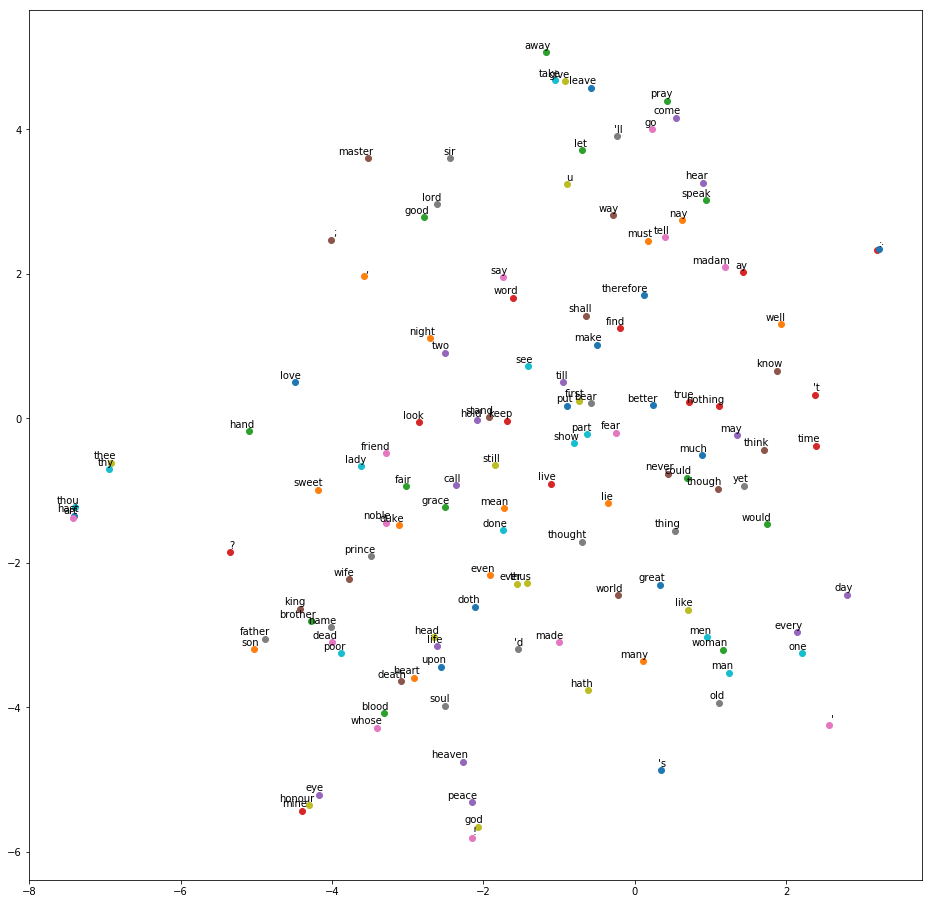

In [36]:
tsne_plot(model)

In [37]:
model.most_similar('come')

[('go', 0.8642858266830444),
 ('nay', 0.8503705859184265),
 ('pray', 0.8176155686378479),
 ('way', 0.7899680137634277),
 ('must', 0.7635902166366577),
 ('let', 0.7427610754966736),
 ('tell', 0.727936327457428),
 ('hear', 0.7262541055679321),
 ('away', 0.7261614799499512),
 ("'ll", 0.694641649723053)]

In [38]:
type(model.most_similar('son'))

list

## Latent Semantic Analysis

Reference: 
- https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

In [0]:
import seaborn as sns
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [40]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [41]:
# 20 topics in the dataset
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [45]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [46]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+ str(i) + ": ", end = ' ')
    for t in sorted_terms:
        print(t[0], end = ", ")
    print()

Topic 0:  like, know, people, think, good, time, thanks, 
Topic 1:  thanks, windows, card, drive, mail, file, advance, 
Topic 2:  game, team, year, games, season, players, good, 
Topic 3:  drive, scsi, disk, hard, card, drives, problem, 
Topic 4:  windows, file, window, files, program, using, problem, 
Topic 5:  government, chip, mail, space, information, encryption, data, 
Topic 6:  like, bike, know, chip, sounds, looks, look, 
Topic 7:  card, sale, video, offer, monitor, price, jesus, 
Topic 8:  know, card, chip, video, government, people, clipper, 
Topic 9:  good, know, time, bike, jesus, problem, work, 
Topic 10:  think, chip, good, thanks, clipper, need, encryption, 
Topic 11:  thanks, right, problem, good, bike, time, window, 
Topic 12:  good, people, windows, know, file, sale, files, 
Topic 13:  space, think, know, nasa, problem, year, israel, 
Topic 14:  space, good, card, people, time, nasa, thanks, 
Topic 15:  people, problem, window, time, game, want, bike, 
Topic 16:  time,